# Samples representation

## Imports 

In [1]:
from striplog import Component, Lexicon, Legend, Interval, Position, Decor
from core.omf import Borehole3D
from utils.lexicon.lexicon_fr import pollutant_memoris, lithology_memoris
import random
import pandas as pd

/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.8/site-packages/striplog/legend.py:687: UserWarning: This legend contains duplicate components.
  warnings.warn(w)
/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.8/site-packages/striplog/legend.py:687: UserWarning: This legend contains duplicate components.
  warnings.warn(w)


## Creation of Borehole3D objects

In [2]:
samples = [Component({'lithology': 'remblais', 'pollutant':'VR'}),
              Component({'lithology': 'limon', 'pollutant':'VI'}),
              Component({'lithology': 'schistes', 'pollutant':'VS'}),
              Component({'lithology': 'sable', 'pollutant':'VR'}),
              Component({'lithology': 'inconnu', 'pollutant':'VI'})]

In [3]:
extra_components = [Component({'lithology': 'marnes', 'pollutant':'VS'}),
                    Component({'lithology': 'calcaires', 'pollutant':'VS'})]

In [4]:
samples_intervals = [Interval(top=0, base=2, components=[samples[0]], data={'Naphtalene':50}),
                     Interval(top=2, base=3, components=[samples[1]], data={'Benzene': {'value': 1.52, 'units': 'µg/l'}}),
                     Interval(top=3, base=6, components=[samples[2]]),
                     Interval(top=6, base=8, components=[samples[3]]),
                     Interval(top=8, base=10, components=[samples[4]])]

In [5]:
extra_intervals = [Interval(top=10, base=13, components=[extra_components[0]], data={'Naphtalène':100}),
                     Interval(top=13, base=15, components=[extra_components[1]]),]

In [6]:
leg_dict = {'lithology':{'legend': lithology_memoris}, 'pollutant':{'legend': pollutant_memoris}}

In [7]:
bh3d = Borehole3D(name='BH_1', intervals=samples_intervals, legend_dict=leg_dict, length=10, )

Borehole geometry created successfully !


In [8]:
bh3d.intervals[1].data['Benzene']

{'value': 1.52, 'units': 'µg/l'}

In [9]:
bh3d_2 = Borehole3D(name='BH_2', intervals=samples_intervals+extra_intervals, legend_dict=leg_dict, length=15, )

Borehole geometry created successfully !


In [10]:
s = [Component({'lithology': 'remblais', 'pollutant':'VR'}), 
     Component({'lithology': 'limon', 'pollutant':'VI'}),
     Component({'lithology': 'sable', 'pollutant':'VR'}),]

s_intv = [Interval(top=0, base=2, components=[s[0]], data={'Naphtalene':50}),
          Interval(top=2, base=3, components=[s[1]], data={'Benzene': {'value': 1.52, 'units': 'µg/l'}}),
          Interval(top=3, base=6, components=[s[2]]),]

In [11]:
bh3d_3 = Borehole3D(name='BH_3', intervals=s_intv, legend_dict=leg_dict, length=6, )

Borehole geometry created successfully !


In [12]:
bh3d.intervals[0].top.middle

0.0

## Legend and cmap plotting

In [13]:
attrib = ['lithology', 'pollutant']

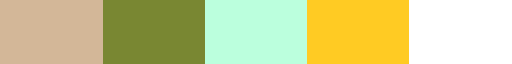

In [14]:
bh3d.legend_dict[attrib[0]]['cmap']

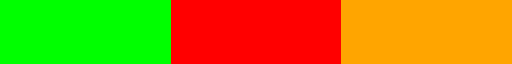

In [15]:
bh3d.legend_dict[attrib[1]]['cmap']

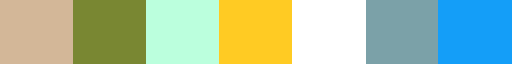

In [16]:
bh3d_2.legend_dict[attrib[0]]['cmap']

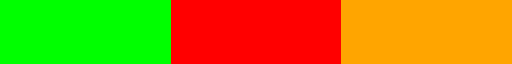

In [17]:
bh3d_2.legend_dict[attrib[1]]['cmap']

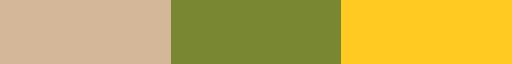

In [18]:
bh3d_3.legend_dict[attrib[0]]['cmap']

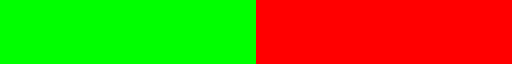

In [19]:
bh3d_3.legend_dict[attrib[1]]['cmap']

## Build several boreholes legend/cmap

In [20]:
from utils.omf import build_bh3d_legend_cmap

In [21]:
bh3d_list = [bh3d, bh3d_2, bh3d_3]

synth_leg_dict, detail_leg_dict = build_bh3d_legend_cmap(bh3d_list, legend_dict=leg_dict, 
                                                         repr_attrib_list=['lithology', 'pollutant'], 
                                                         compute_all=True,)# verbose=True)

In [22]:
glob_leg_dict[attrib[0]]['legend']

Legend(Decor({'_colour': '#d3b798', 'width': 3, 'hatch': "'v'", 'component': Component({'lithology': 'remblais'})})
Decor({'_colour': '#798732', 'width': 3, 'hatch': "'-.'", 'component': Component({'lithology': 'limon'})})
Decor({'_colour': '#bbffdd', 'width': 3, 'hatch': "'--'", 'component': Component({'lithology': 'schistes'})})
Decor({'_colour': '#ffcb23', 'width': 3, 'hatch': "'..'", 'component': Component({'lithology': 'sable'})})
Decor({'_colour': '#ffffff', 'width': 3, 'hatch': '/|\\', 'component': Component({'lithology': 'inconnu'})})
Decor({'_colour': '#7ba1a8', 'width': 3, 'hatch': None, 'component': Component({'lithology': 'marnes'})})
Decor({'_colour': '#149ef8', 'width': 3, 'hatch': None, 'component': Component({'lithology': 'calcaires'})}))

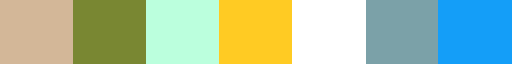

In [23]:
glob_leg_dict[attrib[0]]['cmap']

In [25]:
bh3d.legend_dict

{'lithology': {'legend': Legend(Decor({'_colour': '#d3b798', 'width': 3, 'hatch': "'v'", 'component': Component({'lithology': 'remblais'})})
  Decor({'_colour': '#798732', 'width': 3, 'hatch': "'-.'", 'component': Component({'lithology': 'limon'})})
  Decor({'_colour': '#bbffdd', 'width': 3, 'hatch': "'--'", 'component': Component({'lithology': 'schistes'})})
  Decor({'_colour': '#ffcb23', 'width': 3, 'hatch': "'..'", 'component': Component({'lithology': 'sable'})})
  Decor({'_colour': '#ffffff', 'width': 3, 'hatch': '/|\\', 'component': Component({'lithology': 'inconnu'})})),
  'cmap': <matplotlib.colors.ListedColormap at 0x7f4f6d0ca250>,
  'values': ['remblais', 'limon', 'schistes', 'sable', 'inconnu']},
 'pollutant': {'legend': Legend(Decor({'_colour': '#00ff00', 'width': 3, 'component': Component({'pollutant': 'VR'}), 'hatch': None})
  Decor({'_colour': '#ff0000', 'width': 3, 'component': Component({'pollutant': 'VI'}), 'hatch': None})
  Decor({'_colour': '#ffa500', 'width': 3, 'co

## 2D/3D display

/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.8/site-packages/striplog/striplog.py:1505: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "'v". Passing invalid values is deprecated since 3.4 and will become an error two minor releases later.
  rect = mpl.patches.Rectangle(origin,
/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.8/site-packages/striplog/striplog.py:1505: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "'". Passing invalid values is deprecated since 3.4 and will become an error two minor releases later.
  rect = mpl.patches.Rectangle(origin,
/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.8/site-packages/striplog/legend.py:311: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "'". Passi

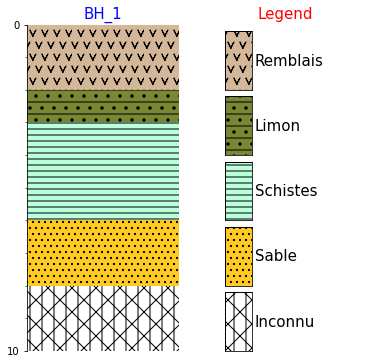

In [26]:
bh3d.log_plot(repr_attribute='lithology')

In [28]:
bh3d.plot3d(repr_attribute='lithology')

{0.4: 'remblais', 1.2000000000000002: 'limon', 2.0: 'schistes', 2.8000000000000003: 'sable', 3.6: 'inconnu'}
5


ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

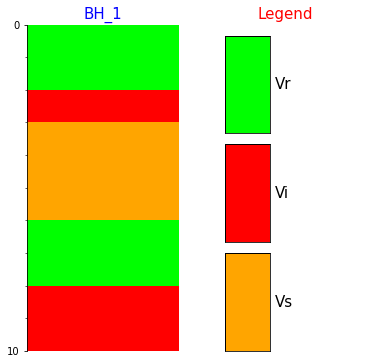

In [24]:
bh3d.log_plot(repr_attribute='pollutant')#, repr_legend=pollutant_memoris)

In [29]:
bh3d.plot3d(repr_attribute='pollutant', repr_legend=pollutant_memoris)

{0.3333333333333333: 'VR', 1.0: 'VI', 1.6666666666666665: 'VS'}
3


ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

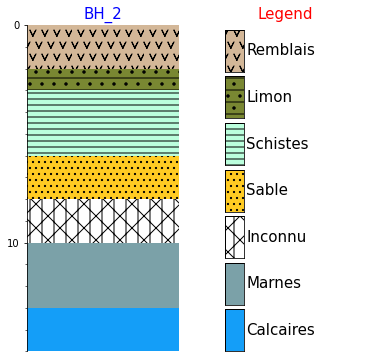

In [27]:
bh3d_2.log_plot(repr_attribute='lithology')

In [30]:
bh3d_2.plot3d(repr_attribute='lithology')

{0.42857142857142855: 'remblais', 1.2857142857142856: 'limon', 2.142857142857143: 'schistes', 3.0: 'sable', 3.8571428571428568: 'inconnu', 4.7142857142857135: 'marnes', 5.571428571428571: 'calcaires'}
7


ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [31]:
bh3d._vtk

PolyData (0x7f4f6d043d00)
  N Cells:	260
  N Points:	1000
  X Bounds:	-1.248e+00, 1.248e+00
  Y Bounds:	-1.250e+00, 1.250e+00
  Z Bounds:	-2.000e+00, 8.000e+00
  N Arrays:	5

In [32]:
bh3d_2._components[0]['lithology']

'remblais'

In [33]:
len(bh3d.intervals), len(bh3d_2.intervals)

(5, 7)